# Análise do Faturamento da Empresa

#### Cenário: A empresa gera receita a partir de 4 plataformas de pagamento diferentes: Hotmart, Kiwify, Stripe e Perfect Pay. 

#### O presente trabalho buscou consolidar as bases de dados em um único DataFrame, tratar os dados e analisar o faturamento.

Observação: Os nomes dos produtos foram anonimizados e os valores de vendas foram multiplicados por um fator multiplicador. 

----------------------------------------------------------------------------------------------------------------------------------------------------------------

### Importando bibliotecas

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### Importando bases de dados

In [2]:
df_hotmart = pd.read_excel('Historico_Hotmart.xlsx')
df_kiwify = pd.read_excel('Historico_Kiwify.xlsx')
df_stripe = pd.read_csv('Historico_Stripe.csv')

# O sistema da Perfect Pay (PP) não permitiu extrair todos os dados em um único arquivo
df_pp_parte_1 = pd.read_excel('Historico_PP_pt1.xlsx')
df_pp_parte_2 = pd.read_excel('Historico_PP_pt2.xlsx')

pd.set_option('display.max.columns', 60) # Para ver todas as colunas do Df

### Consolidando as duas bases da Perfect Pay (parte 1 e 2) em uma só

In [3]:
# Conferindo se número de colunas é o mesmo
print(df_pp_parte_1.shape)
print(df_pp_parte_2.shape)

# Unindo as duas bases da Perfect Pay
df_pp = pd.concat([df_pp_parte_1, df_pp_parte_2], ignore_index=True)

(1732, 43)
(4015, 43)


### Selecionando quais colunas vão ser analisadas

In [4]:
# display(df_hotmart.head(1))
# display(df_kiwify.head(1))
# display(df_pp.head(1))
# display(df_stripe.head(1))

### Colunas Selecionadas:
- Hotmart: Nome do Produto, Data de Venda, Status, País, Tipo de Pagamento, Valor da Comissão Convertido
<br> <p>Criar coluna de Valor da Venda = (Preço Total Convertido X Taxa de Câmbio da Comissão)<p>
- Kiwify: Status, Produto, Valor líquido, Preço base do produto, Pagamento, Data de Criação
<br> <p>Criar coluna de País (Todas as vendas da Kiwify são no Brasil)<p>
- Perfect Pay: DataVenda, Status, FormaPagamento, Produto, ValorVenda, ValorComissão
<br> <p>Criar coluna de País (Todas as vendas da Perfect Pay são no Brasil)<p>
- Stripe: Created (UTC), Converted Amount, Status 
<br> <p>Criar coluna de produto, de país, de forma de pagamento e de valor líquido (Converted Amount - Fee)<p>

### Ajustando as bases de dados

- Hotmart

In [5]:
# Verificando se há valores vazios na coluna de País
print(df_hotmart['País'].isnull().sum())

# Preenchendo valores vazios da coluna de País (O País está especificado nas vendas para o exterior e está vazio para vendas no Brasil)
df_hotmart['País'] = df_hotmart['País'].fillna('Brasil')

62


In [6]:
# Criando coluna de Valor da Venda e nome da Plataforma
df_hotmart['Valor da Venda'] = df_hotmart['Preço Total Convertido'] * df_hotmart['Taxa de Câmbio da Comissão']
df_hotmart['Plataforma'] = 'Hotmart'

# Criando coluna de Mês e Ano
df_hotmart['Mês'] = df_hotmart['Data de Venda'].str[3:5].astype(np.int32, copy=False)
df_hotmart['Ano'] = df_hotmart['Data de Venda'].str[6:10].astype(np.int32, copy=False)

In [7]:
# Verificando se há valores vazios nas colunas de Valor da Venda e Valor da Comissão Convertido
print(df_hotmart['Valor da Venda'].isnull().sum())
print(df_hotmart['Valor da Comissão Convertido'].isnull().sum())

# Preenchendo valores vazios das colunas de Valor da Venda e Valor da Comissão Convertido
df_hotmart['Valor da Venda'] = df_hotmart['Valor da Venda'].fillna(df_hotmart['Preço do Produto'])
df_hotmart['Valor da Comissão Convertido'] = df_hotmart['Valor da Comissão Convertido'].fillna(df_hotmart['Valor da Comissão Gerada'])

79
79


In [8]:
# Filtrando as colunas e já colocando em ordem
df_hotmart = df_hotmart.loc[:, ['Plataforma', 'Nome do Produto', 'Data de Venda', 'Mês', 'Ano', 'Status', 'Valor da Venda', 'Valor da Comissão Convertido', 'Tipo de Pagamento', 'País']]

- Kiwify

In [9]:
# Criando coluna de País e nome da Plataforma
df_kiwify['País'] = 'Brasil'
df_kiwify['Plataforma'] = 'Kiwify'

# Criando coluna de Mês e Ano
df_kiwify['Mês'] = df_kiwify['Data de Criação'].str[3:5].astype(np.int32, copy=False)
df_kiwify['Ano'] = df_kiwify['Data de Criação'].str[6:10].astype(np.int32, copy=False)

In [10]:
# Filtrando as colunas e já colocando em ordem
df_kiwify = df_kiwify.loc[:, ['Plataforma', 'Produto', 'Data de Criação', 'Mês', 'Ano', 'Status', 'Preço base do produto', 'Valor líquido', 'Pagamento', 'País']]

- Perfect Pay

In [11]:
# Criando coluna de País e nome da Plataforma
df_pp['País'] = 'Brasil'
df_pp['Plataforma'] = 'Perfect Pay'

# Criando coluna de Mês e Ano
df_pp['Mês'] = df_pp['DataVenda'].str[3:5].astype(np.int32, copy=False)
df_pp['Ano'] = df_pp['DataVenda'].str[6:10].astype(np.int32, copy=False)

In [12]:
# Filtrando as colunas e já colocando em ordem
df_pp = df_pp.loc[:, ['Plataforma', 'Produto', 'DataVenda', 'Mês', 'Ano', 'Status', 'ValorVenda', 'ValorComissão', 'FormaPagamento', 'País']]

In [13]:
# Analisando os tipos de cada coluna
print(df_pp.dtypes)

# Transformando as colunas de valor em float
df_pp['ValorVenda'] = df_pp['ValorVenda'].str.replace(',', '.').astype(np.float32, copy=False)
df_pp['ValorComissão'] = df_pp['ValorComissão'].str.replace(',', '.').astype(np.float32, copy=False)

Plataforma        object
Produto           object
DataVenda         object
Mês                int32
Ano                int32
Status            object
ValorVenda        object
ValorComissão     object
FormaPagamento    object
País              object
dtype: object


- Stripe

In [14]:
# Criando colunas de País, Produto, Forma de Pagamento, Valor líquido e Plataforma
df_stripe['País'] = 'Exterior'
df_stripe['Produto'] = 'EspiaYa'
df_stripe['Forma de Pagamento'] = 'Cartao de Credito'
df_stripe['Valor líquido'] = df_stripe['Converted Amount'] - df_stripe['Fee']
df_stripe['Plataforma'] = 'Stripe'

# Criando coluna de Mês e Ano
df_stripe['Mês'] = df_stripe['Created (UTC)'].str[5:7].astype(np.int32, copy=False)
df_stripe['Ano'] = df_stripe['Created (UTC)'].str[0:4].astype(np.int32, copy=False)

In [15]:
# Filtrando as colunas e já colocando em ordem
df_stripe = df_stripe.loc[:, ['Plataforma', 'Produto', 'Created (UTC)', 'Mês', 'Ano', 'Status', 'Converted Amount', 'Valor líquido', 'Forma de Pagamento', 'País']]

### Consolidando as 4 bases de dados

In [16]:
# Para juntar bases com nomes de colunas diferentes, é preciso retirar o nome das colunas, depois juntar e depois renomear

df_hotmart.columns = range(df_stripe.shape[1])
df_kiwify.columns = range(df_stripe.shape[1])
df_pp.columns = range(df_stripe.shape[1])
df_stripe.columns = range(df_stripe.shape[1])

In [17]:
# Juntando os DataFrames

bases = [df_hotmart, df_kiwify, df_pp, df_stripe]

df_consolidado = pd.DataFrame()

for dataframe in bases:
    df_consolidado = pd.concat([df_consolidado, dataframe], axis=0)

df_consolidado = df_consolidado.reset_index(drop=True)
df_consolidado.columns = ['Plataforma', 'Produto', 'Data da Venda', 'Mês', 'Ano', 'Status', 'Valor da Venda', 'Valor da Comissão', 'Forma de Pagamento', 'Pais']

print(df_consolidado.shape)

(7533, 10)


### Analisando e tratando colunas do DataFrame consolidado

- Produto

In [18]:
# Anonimizando os nomes dos produtos

df_prod_anon = pd.read_excel('De_Para_Prod_Anon.xlsx')

for linha in df_consolidado['Produto']:
    if linha in list(df_prod_anon['Produto']):
        df_consolidado.loc[df_consolidado['Produto'] == linha, 'Produto'] = df_prod_anon.loc[df_prod_anon['Produto'] == linha, 'Anon'].values[0]

In [19]:
# Produtos com menos de 30 vendas recebem a classificação 'Outros'

tabela_produtos = df_consolidado['Produto'].value_counts()
produtos_agrupar = []

for produto in tabela_produtos.index:
    if tabela_produtos[produto] < 30:
        produtos_agrupar.append(produto)

for produto in produtos_agrupar:
    df_consolidado.loc[df_consolidado['Produto'] == produto, 'Produto'] = 'Outros'

display(df_consolidado['Produto'].value_counts())

Produto A    5186
Produto B    1286
Produto C     501
Outros        142
Produto G     119
Produto D     112
Produto E      67
Produto I      49
Produto F      36
Produto H      35
Name: Produto, dtype: int64

- Status

In [20]:
# Tratando a coluna de status para palavras diferentes, mas que significam a mesma coisa

for linha in df_consolidado['Status']:
    if (linha == 'Completo') or (linha == 'Paid') or (linha == 'paid'):
        df_consolidado.loc[df_consolidado['Status'] == linha, 'Status'] = 'Aprovado'
    elif (linha == 'Charge Back') or (linha == 'chargedback'):
        df_consolidado.loc[df_consolidado['Status'] == linha, 'Status'] = 'Chargeback'
    elif (linha == 'Devolvida') or (linha == 'refunded'):
        df_consolidado.loc[df_consolidado['Status'] == linha, 'Status'] = 'Reembolsado'

df_consolidado['Status'].value_counts()

Aprovado       6751
Reembolsado     448
Chargeback      334
Name: Status, dtype: int64

- Valor da Venda

In [21]:
# Anonimizando dados da coluna de Valores de Venda

FatorMultiplicador = pd.read_excel('FatorMultiplicador.xlsx').values[0]

df_consolidado['Valor da Venda'] = df_consolidado['Valor da Venda']*FatorMultiplicador

# Arredondando para 2 casas decimais

df_consolidado['Valor da Venda'] = round(df_consolidado['Valor da Venda'], 2)

- Valor da Comissão

In [22]:
# Anonimizando dados da coluna de Valor da Comissão

FatorMultiplicador = pd.read_excel('FatorMultiplicador.xlsx').values[0]

df_consolidado['Valor da Comissão'] = df_consolidado['Valor da Comissão']*FatorMultiplicador

# Arredondando para 2 casas decimais

df_consolidado['Valor da Comissão'] = round(df_consolidado['Valor da Comissão'], 2)

- Forma de Pagamento

In [23]:
# Tratando a coluna de Forma de Pagamento para palavras escritas de forma diferente, mas que significam a mesma coisa

for linha in df_consolidado['Forma de Pagamento']:
    if (linha == 'Cartao de Credito') or (linha == 'mastercard') or (linha == 'visa'):
        df_consolidado.loc[df_consolidado['Forma de Pagamento'] == linha, 'Forma de Pagamento'] = 'Cartão de Crédito'
    elif linha == 'pix':
        df_consolidado.loc[df_consolidado['Forma de Pagamento'] == linha, 'Forma de Pagamento'] = 'Pix'

df_consolidado['Forma de Pagamento'].value_counts()

Cartão de Crédito    3911
Pix                  3452
Nequi                  76
PSE                    31
PayPal                 28
Mercado Pago           14
elo                     8
Servipag                5
Mach Pay                4
SPEI                    1
Apple Pay               1
boleto                  1
hipercard               1
Name: Forma de Pagamento, dtype: int64

In [24]:
# Meios de pagamento com menos de 20 vendas recebem a classificação 'Outros'

tabela_pagamento = df_consolidado['Forma de Pagamento'].value_counts()
pagamento_agrupar = []

for pagamento in tabela_pagamento.index:
    if tabela_pagamento[pagamento] < 20:
        pagamento_agrupar.append(pagamento)

for pagamento in pagamento_agrupar:
    df_consolidado.loc[df_consolidado['Forma de Pagamento'] == pagamento, 'Forma de Pagamento'] = 'Outros'

display(df_consolidado['Forma de Pagamento'].value_counts())

Cartão de Crédito    3911
Pix                  3452
Nequi                  76
Outros                 35
PSE                    31
PayPal                 28
Name: Forma de Pagamento, dtype: int64

- País

In [25]:
# Transformar todos países fora o Brasil em 'Exterior'

for linha in df_consolidado['Pais']:
    if linha != 'Brasil':
        df_consolidado.loc[df_consolidado['Pais'] == linha, 'Pais'] = 'Exterior'

df_consolidado['Pais'].value_counts()

Brasil      6072
Exterior    1461
Name: Pais, dtype: int64

### Conferindo a versão final da tabela consolidada

In [26]:
df_consolidado = df_consolidado.sort_values(by=['Ano', 'Mês'], ascending=True).reset_index(drop=True)

print(df_consolidado.shape) # Conferindo linhas e colunas da tabela consolidada
print(df_consolidado.isnull().sum()) # Verificando se não há valores vazios em nenhuma coluna

(7533, 10)
Plataforma            0
Produto               0
Data da Venda         0
Mês                   0
Ano                   0
Status                0
Valor da Venda        0
Valor da Comissão     0
Forma de Pagamento    0
Pais                  0
dtype: int64


In [27]:
display(df_consolidado.head())

,Plataforma,Produto,Data da Venda,Mês,Ano,Status,Valor da Venda,Valor da Comissão,Forma de Pagamento,Pais
0,Hotmart,Produto I,30/04/2022 16:40:43,4,2022,Aprovado,36.45,19.33,Pix,Brasil
1,Hotmart,Outros,30/04/2022 08:17:55,4,2022,Aprovado,26.86,14.04,Pix,Brasil
2,Hotmart,Produto I,29/04/2022 14:48:44,4,2022,Aprovado,36.45,19.33,Pix,Brasil
3,Hotmart,Produto I,29/04/2022 11:26:39,4,2022,Aprovado,36.45,19.33,Pix,Brasil
4,Hotmart,Outros,12/04/2022 23:52:04,4,2022,Aprovado,36.45,19.33,Pix,Brasil


### Visualização e análise dos dados

- Número de vendas por forma de pagamento

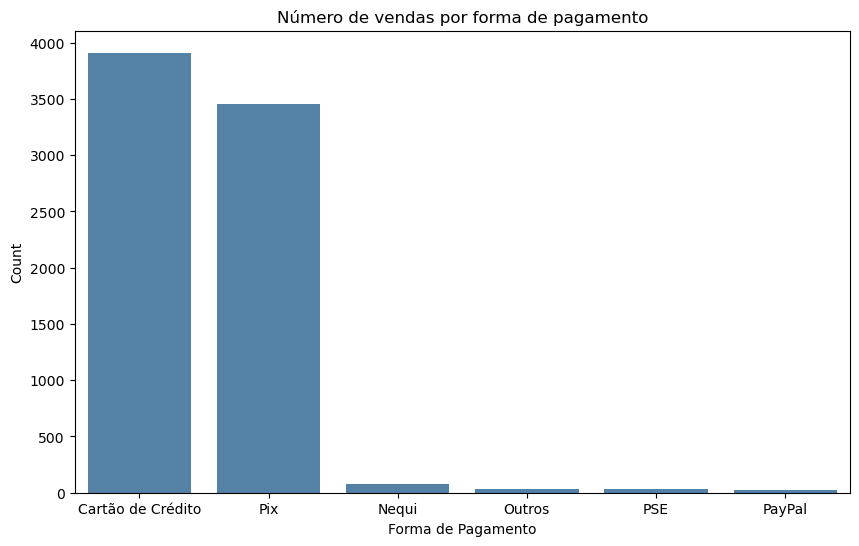

In [28]:
# Selecionando os dados

vendas_forma_pagamento = df_consolidado.groupby(['Forma de Pagamento'])['Status'].count().reset_index().sort_values(by='Status', ascending=False)

# Plotando o gráfico

plt.figure(figsize=(10, 6))
sns.barplot(x='Forma de Pagamento', y='Status', data=vendas_forma_pagamento, color='steelblue')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Count')
plt.title('Número de vendas por forma de pagamento')
plt.show()

- Número de vendas Brasil vs Exterior

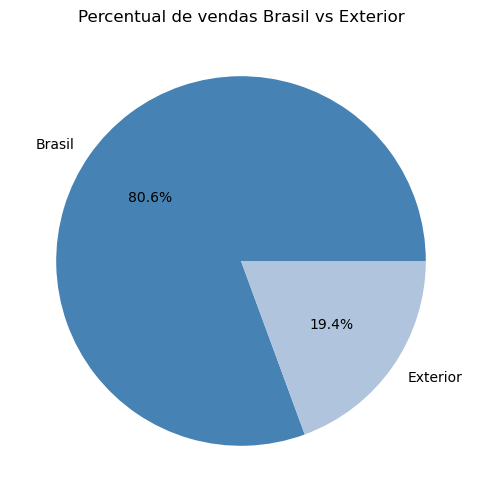

In [29]:
# Selecionando os dados

vendas_pais = df_consolidado.groupby('Pais')['Status'].count()

# Plotando o gráfico

colors = ['steelblue', 'lightsteelblue']

plt.figure(figsize=(8, 6))
plt.pie(vendas_pais, labels=vendas_pais.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentual de vendas Brasil vs Exterior')
plt.show()

- Breakdown do faturamento por plataforma

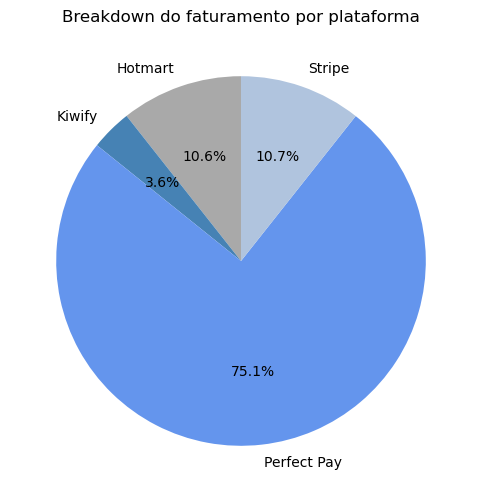

In [30]:
# Selecionando os dados

vendas_plataforma = df_consolidado.groupby('Plataforma')['Valor da Venda'].sum()

# Plotando o gráfico

colors = ['darkgrey', 'steelblue', 'cornflowerblue', 'lightsteelblue']

plt.figure(figsize=(10, 6))
plt.pie(vendas_plataforma, labels=vendas_plataforma.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Breakdown do faturamento por plataforma')
plt.show()

- Faturamento por produto

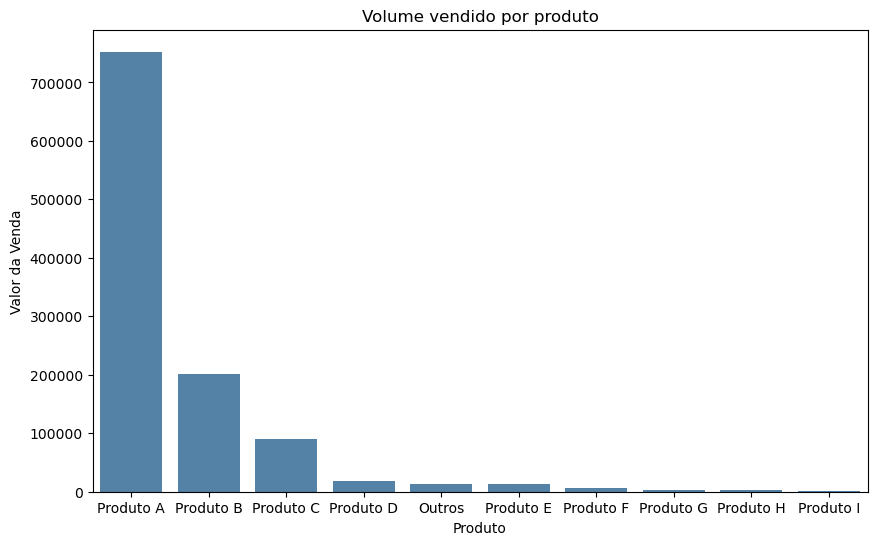

In [31]:
# Selecionando os dados

vendas_produto = df_consolidado.groupby(['Produto'])['Valor da Venda'].sum().reset_index().sort_values(by='Valor da Venda', ascending=False)

# Plotando o gráfico

plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Valor da Venda', data=vendas_produto, color='steelblue')
plt.xlabel('Produto')
plt.ylabel('Valor da Venda')
plt.title('Volume vendido por produto')
plt.show()